Importing important libraries:

In [33]:
import numpy as np
import time
import pandas as pd

import tensorflow as tf
from tensorflow import keras

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns; sns.set()

Checking GPU if avialable then will use that for fast processing.

In [34]:
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 0


Data uploadind Using Tensorflow/Keras 

In [35]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_ds = image_dataset_from_directory(
    "E:/Ahmad_Files_Sem2/Tech3300/Assessment 2 Data/data/train",
    image_size=(100, 100),
    batch_size=32,
    validation_split=0.15,
    subset="training",
    seed=123
)

val_ds = image_dataset_from_directory(
    "E:/Ahmad_Files_Sem2/Tech3300/Assessment 2 Data/data/train",
    image_size=(100, 100),
    batch_size=32,
    validation_split=0.15,
    subset="validation",
    seed=123
)

test_ds = image_dataset_from_directory(
    "E:/Ahmad_Files_Sem2/Tech3300/Assessment 2 Data/data/test",
    image_size=(100, 100),
    batch_size=32,
    shuffle=False
)

Found 6024 files belonging to 14 classes.
Using 5121 files for training.
Found 6024 files belonging to 14 classes.
Using 903 files for validation.
Found 663 files belonging to 14 classes.


Exploring some data info:

In [36]:
class_names = train_ds.class_names
print(class_names)


['Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cherry', 'Corn', 'Kiwi', 'Mango', 'Orange', 'Pineapple', 'Strawberry', 'Watermelon']


In [37]:
for images, labels in train_ds.take(1):
    print(images.shape)
    print(labels.shape)  

(32, 100, 100, 3)
(32,)


Lets see inspect some of the data we have:

In [38]:
for images, labels in train_ds.take(1):
    # Convert the image tensor to NumPy for plotting
    img = images[10].numpy()
    label = labels[10].numpy()
    print(img)
    print(label)


[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
8


Some Preprocessing: As seen above 255 is largest no in data we can make it in range 0-1 by diving by 255

In [39]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))


[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
7


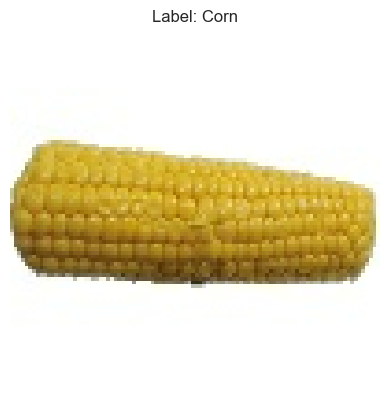

In [40]:
for images, labels in train_ds.take(1):
    # Convert the image tensor to NumPy for plotting
    img = images[10].numpy()
    label = labels[10].numpy()
    print(img)
    print(label)
    
    plt.imshow(img)
    plt.title(f"Label: {class_names[label]}")
    plt.axis('off')
    plt.show()
    break


Checking The Class distribution:

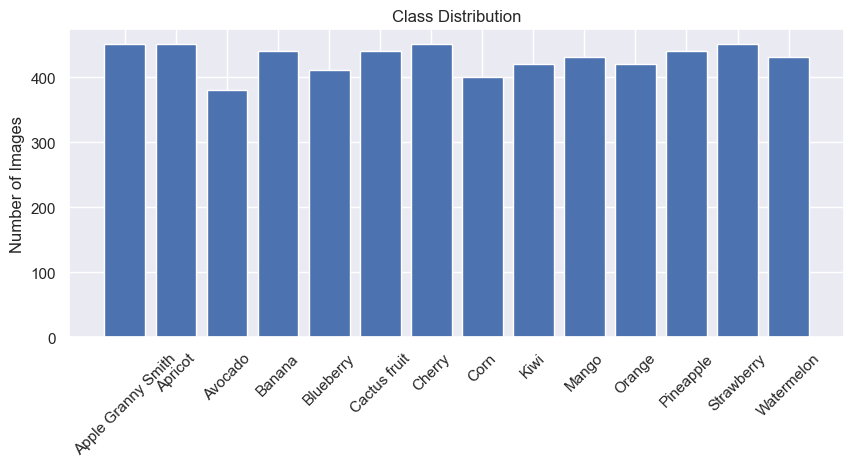

In [41]:
import os
def plot_class_distribution(data_dir):
    class_counts = {}
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    
    plt.figure(figsize=(10, 4))
    plt.bar(class_counts.keys(), class_counts.values())
    plt.title("Class Distribution")
    plt.xticks(rotation=45)
    plt.ylabel("Number of Images")
    plt.show()

plot_class_distribution("E:/Ahmad_Files_Sem2/Tech3300/Assessment 2 Data/data/train")


CNN Model Creation: Here i have created different models and one at once in training.

Model 1:

Model 2:

With Dropout layer: to reduce chance of overfitting by using 50% of neurons from that layer.

In [42]:
from tensorflow.keras import layers, models

num_classes = len(class_names)

model = models.Sequential([
    layers.Input(shape=(100, 100, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])



Compiling the model:

In [43]:
from tensorflow.keras.optimizers import Adam

Optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=Optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Train The model:

In [44]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 102ms/step - accuracy: 0.6061 - loss: 1.1421 - val_accuracy: 0.9679 - val_loss: 0.0981
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.9601 - loss: 0.1274 - val_accuracy: 0.9945 - val_loss: 0.0096
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 19s 116ms/step - accuracy: 0.9839 - loss: 0.0519 - val_accuracy: 0.9978 - val_loss: 0.0046
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - accuracy: 0.9664 - loss: 0.1206 - val_accuracy: 1.0000 - val_loss: 1.3815e-04
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - accuracy: 0.9868 - loss: 0.0398 - val_accuracy: 1.0000 - val_loss: 2.2875e-05
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - accuracy: 0.9932 - loss: 0.0228 - val_accuracy: 1.0000 - val_loss: 8.2018e-04
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 108ms/step - accuracy: 0.9931 - loss: 0.0206 - val_accuracy: 1.0000 - val_loss: 1.5311e-05
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 108ms/step - accuracy: 

In [45]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 14)                  │           1,806 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,200,748 (19.84 MB)

 Trainable params: 1,733,582 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,467,166 (13.23 MB)

Checking model performance:

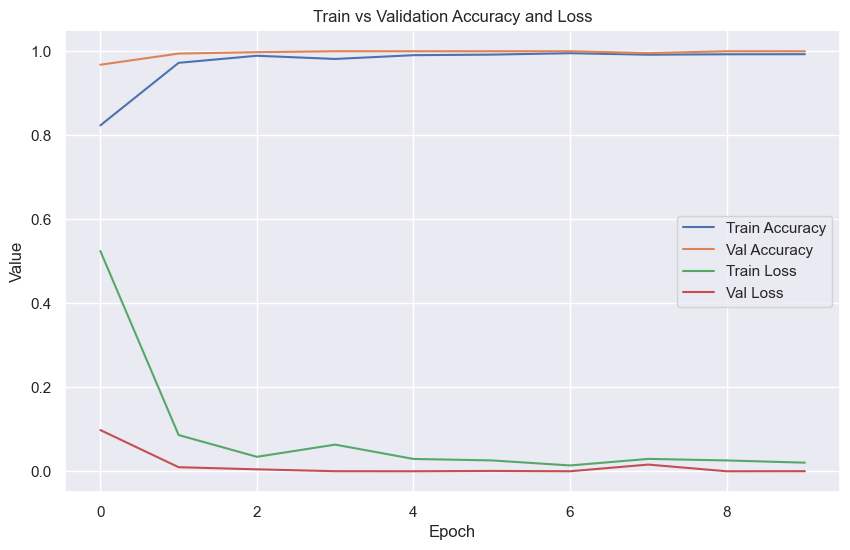

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Train vs Validation Accuracy and Loss')
plt.legend()
plt.grid(True)
plt.show()


Now testing model on test dataset:

In [47]:
# Now run the model on the test set and get results (loss and accuracy both reported)
testres = model.evaluate(test_ds, verbose=0)
print(f"Final loss value = {testres[0]}")
print(f"Accuaracy of the model = {testres[1]}")

Final loss value = 0.00010261590068694204
Accuaracy of the model = 1.0


Finally Predicting some labels by giving model some test images to see how it worked.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


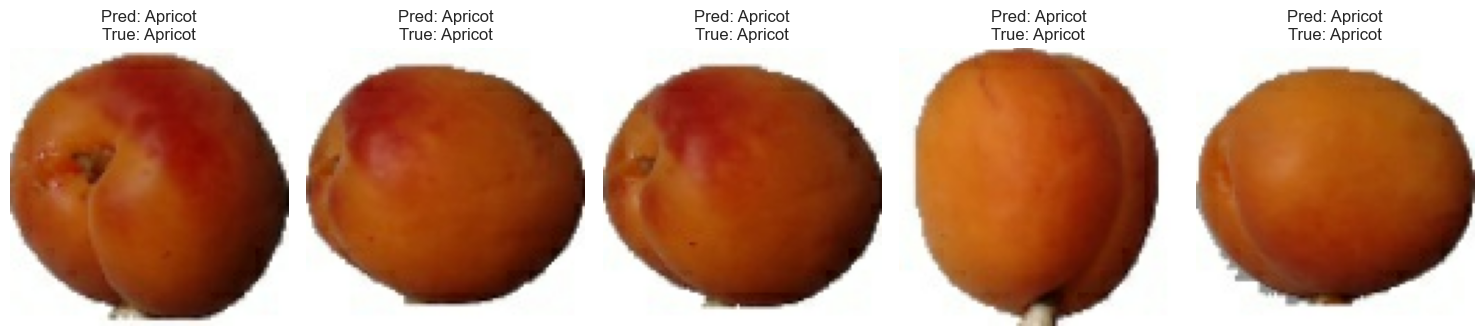

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Extract all test images and labels into lists
all_images = []
all_labels = []

for images, labels in test_ds:
    all_images.extend(images.numpy())
    all_labels.extend(labels.numpy())

# Convert to numpy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Step 2: Select indices 100 to 104
selected_images = all_images[60:65]
selected_labels = all_labels[60:65]

# Step 3: Make predictions
predictions = model.predict(selected_images)
predicted_labels = np.argmax(predictions, axis=1)

# Step 4: Display results
plt.figure(figsize=(15, 5))
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(selected_images[i])
    true_name = class_names[selected_labels[i]]
    pred_name = class_names[predicted_labels[i]]
    plt.title(f"Pred: {pred_name}\nTrue: {true_name}")
    plt.axis('off')
plt.tight_layout()
plt.show()

